# visualiser le flux RSS

In [ ]:
import feedparser
from rss import get_RSS_URL

parsed_flow = feedparser.parse(get_RSS_URL())

In [ ]:
parsed_flow

{'bozo': False,
 'entries': [{'title': '"Nosferatu", "Bird", "Joli Joli", "Un ours dans le Jura", "Le Déluge" : quels films pour bien commencer 2025 ?',
   'title_detail': {'type': 'text/plain',
    'language': None,
    'base': 'https://radiofrance-podcast.net/podcast09/rss_14007.xml',
    'value': '"Nosferatu", "Bird", "Joli Joli", "Un ours dans le Jura", "Le Déluge" : quels films pour bien commencer 2025 ?'},
   'links': [{'rel': 'alternate',
     'type': 'text/html',
     'href': 'https://www.radiofrance.fr/franceinter/podcasts/le-masque-et-la-plume/le-masque-et-la-plume-du-dimanche-05-janvier-2025-8398727'},
    {'length': '46404031',
     'type': 'audio/mpeg',
     'href': 'https://rf.proxycast.org/a3082fcd-8ed2-49eb-883c-29b32a1f7b2b/14007-05.01.2025-ITEMA_23985183-2025F4007S0005-22.mp3',
     'rel': 'enclosure'}],
   'link': 'https://www.radiofrance.fr/franceinter/podcasts/le-masque-et-la-plume/le-masque-et-la-plume-du-dimanche-05-janvier-2025-8398727',
   'summary': 'durée : 0

get episodes from parsed_flow

In [ ]:
from datetime import datetime


def format_date(date_str: str) -> str:
    """
    Formate une date donnée au format "Sun, 29 Dec 2024 10:59:39 +0100"
    en "dd/mm/yy hh:MM".

    :param date_str: La date sous forme de chaîne de caractères.
    :return: La date formatée.
    """
    # Parser la date
    date_obj = datetime.strptime(date_str, "%a, %d %b %Y %H:%M:%S %z")
    # Formater la date dans le format "dd/mm/yy hh:MM"
    return date_obj.strftime("%d/%m/%y %H:%M")


def affiche_episode(episode):
    print(f"Date: {format_date(episode.published)}")
    print("Titre: " + episode.title)
    print("url mp3: " + episode.link)
    print("Résumé: " + episode.summary)
    print("\n")

In [ ]:
from rss import extraire_dureesummary

DUREE_MINI = 15  # on ne garde que les épisodes de plus de 15 minutes

episodes = []

for episode in parsed_flow.entries:
    if extraire_dureesummary(episode.summary) > DUREE_MINI * 60:
        episodes.append(episode)

print(f"Nombre d'épisodes de plus de {DUREE_MINI} minutes: {len(episodes)}\n")
for episode in episodes:
    affiche_episode(episode)

Nombre d'épisodes de plus de 15 minutes: 9

Date: 05/01/25 10:59
Titre: "Nosferatu", "Bird", "Joli Joli", "Un ours dans le Jura", "Le Déluge" : quels films pour bien commencer 2025 ?
url mp3: https://www.radiofrance.fr/franceinter/podcasts/le-masque-et-la-plume/le-masque-et-la-plume-du-dimanche-05-janvier-2025-8398727
Résumé: durée : 00:48:18 - Le Masque et la Plume - par : Rebecca Manzoni - Un conte gothique revisité ; dans la banlieue anglaise, une jeune fille rencontre un être mystérieux ; un tourbillon amoureux et musical dans le Paris des années 70 ; une aventure rocambolesque dans le Jura ; un drame historique autour des derniers jours de Louis XVI et Marie-Antoinette... - invités : Murielle Joudet, Xavier Leherpeur, Charlotte LIPINSKA, Christophe Bourseiller - Murielle Joudet : Critique de cinéma pour Le Monde, Xavier Leherpeur : Chroniqueur et critique de cinéma (7e Obsession), Charlotte Lipinska : Critique de cinéma (Télématin), Christophe Bourseiller : Historien, animateur et

# conserver les episodes absent de mongo

# telechargement des mp3 manquant dans le projet

# ajout des balises type (livres, films, pieces de theatres) et transcription (via whisper)

# telecharger d'autres episodes plus anciens

en s'abonnant on peut recuperer les vieux episodes (jusqu'a quand?)

par exemple : https://media.radiofrance-podcast.net/podcast09/14007-05.01.2025-ITEMA_23985183-2025F4007S0005-27.m4a

je vais tester si whisper peut en faire la transcription

oui ca marche

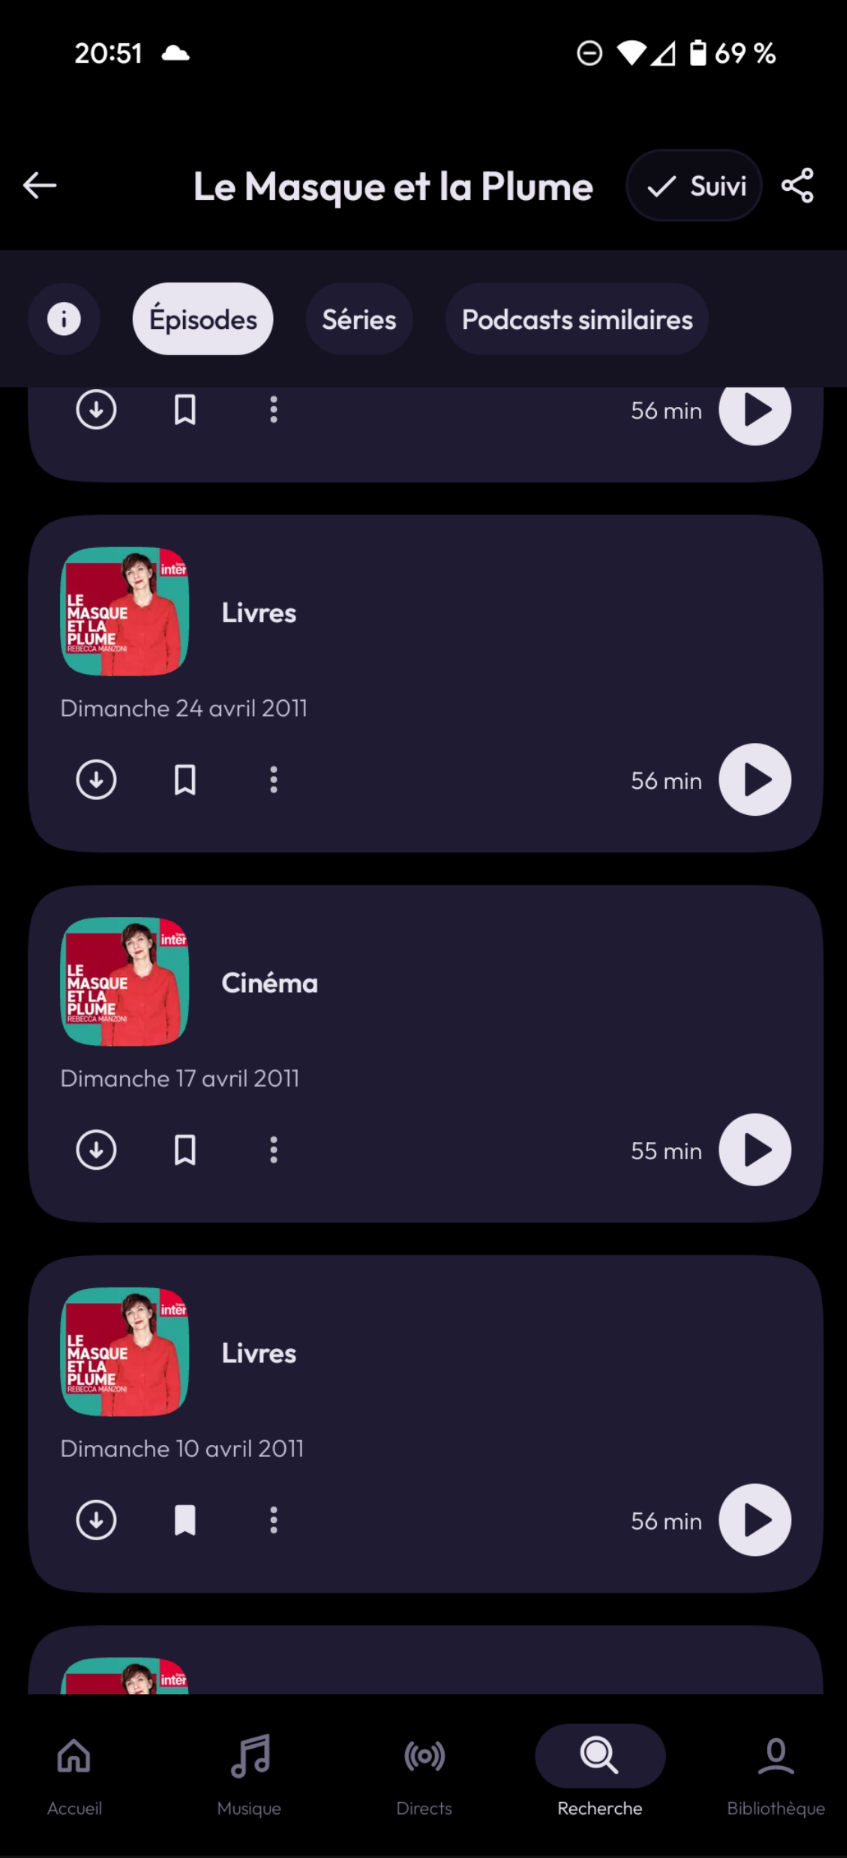

en activant la conservation des episodes, ils sont ensuite visibles sous la bibliotheque radio france (a ecouter plus tard)

https://www.radiofrance.fr/bibliotheque/a-ecouter-plus-tard

j'ai sauve la page complete : `db/À écouter plus tard I Radio France.zip`

peut etre avec beautiful soup je peux en faire qqchose